In [1]:
# SVD for image compression - Its one of the dimensionality reduction technique used in data science.
# Applications of Singular Value Decomposition (SVD)Image Compression, Image Recovery, Eigenfaces, Spectral Clustering, Background Removal from Videos.
# Reduces a high-rank matrix to a low-rank matrix while preserving important information by decomposing the matrix to 3 small matrices.

In [1]:
# Has 2 types - RGB,grayscale
# RGB has intensity issues hence mostly we use grayscale method
# IMAGE COMPRESSION - grayscale
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

(640, 639)

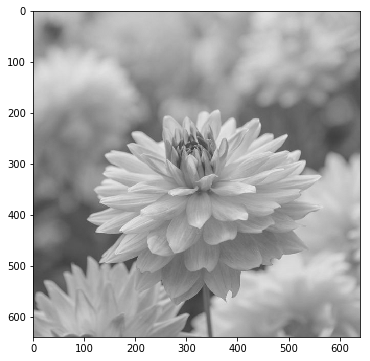

In [2]:
# reading image in greyscale
#image=cv2.imread('DSC_0021.JPG',1)
#cv2.imshow('',image)
#cv2.waitkey(1)
img = Image.open('pink.jpg')
imggray = img.convert('LA')
plt.figure(figsize=(9, 6))
plt.imshow(imggray);
img.size

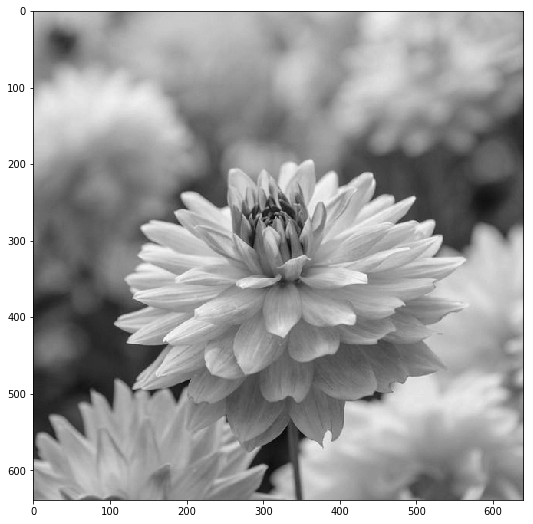

In [3]:
# convert to numpy matrix:
imgmat = np.array(list(imggray.getdata(band=0)), float)
imgmat.shape = (imggray.size[1], imggray.size[0])
imgmat = np.asmatrix(imgmat)
plt.figure(figsize=(16, 9))
plt.imshow(imgmat, cmap='gray')


In [5]:
# decompose the matrix to 3 small matrices U,S,V :
U, S, V=np.linalg.svd(imgmat)

In [6]:
# inspect shapes of the matrices
print(U.shape , S.shape ,V.shape)

((639, 639), (639,), (640, 640))


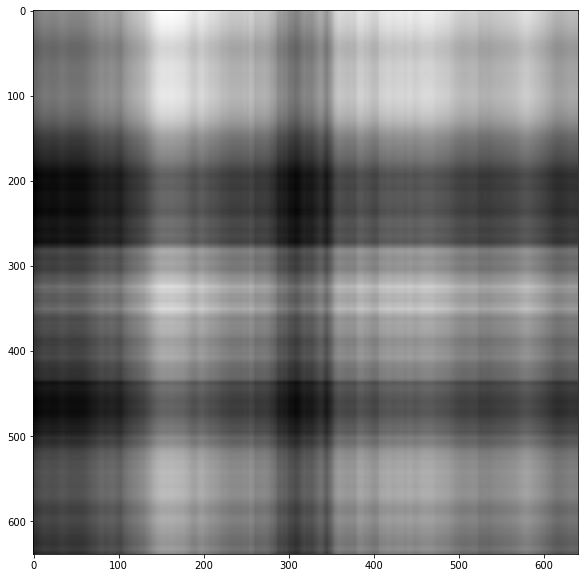

In [7]:
# plot images with different number of components
# plot images with different number of components
#comps = [100, 80, 60, 40, 20]

plt.figure(figsize = (16, 10))
reconstimg = np.asmatrix(U[:, :1]) * np.diag(S[:1]) * np.asmatrix(V[:1, :])
plt.imshow(reconstimg, cmap='gray')
  

for i in range(5,51,5) :
   reconstimg = np.asmatrix(U[:, :i]) * np.diag(S[:i]) * np.asmatrix(V[:i, :])
   plt.imshow(reconstimg,cmap='gray')
   plt.title("n = %s" % i)
   plt.show()


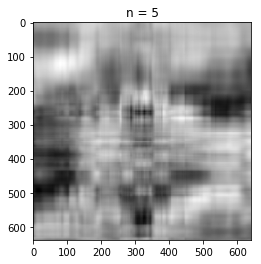

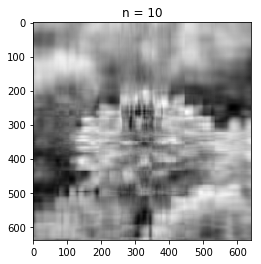

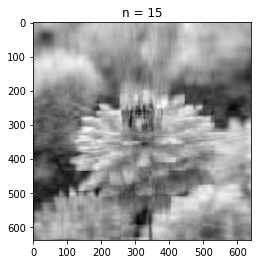

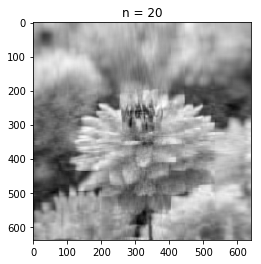

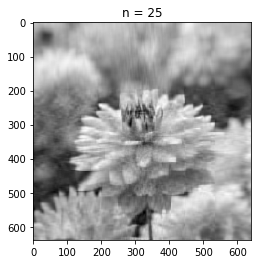

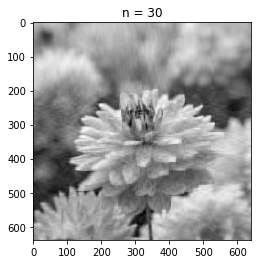

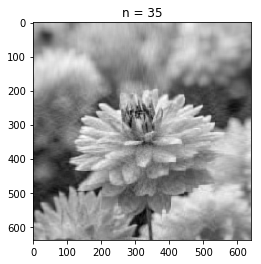

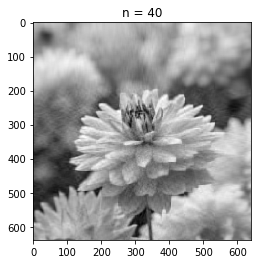

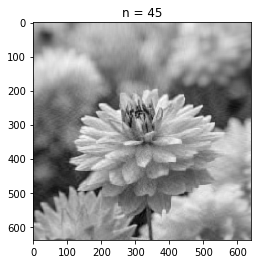

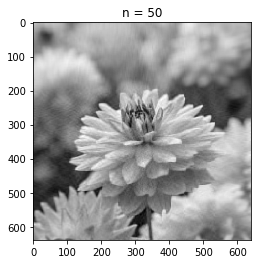

In [8]:
for i in range(5,51,5) :
   reconstimg = np.asmatrix(U[:, :i]) * np.diag(S[:i]) * np.asmatrix(V[:i, :])
   plt.imshow(reconstimg,cmap='gray')
   plt.title("n = %s" % i)
   plt.show()

In [9]:
result = Image.fromarray((reconstimg).astype(np.uint8))
result.save('compressed.jpg')